# Projet GGVIE : Détection de moments clés d'une entreprise

## Import des librairies

In [6]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

## Lecture des données

In [173]:
# Stock etablissement historique
stock_etablissement_hist = pd.read_csv("../data_Projet_GGVie/StockEtablissementHistorique_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement_hist = pd.DataFrame(stock_etablissement_hist.get_chunk(1000000))

In [214]:
df = stock_etablissement_hist.copy()

## Présentation de la donnée

In [215]:
df.head(1000)

,siren,nic,siret,dateFin,dateDebut,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,changementEnseigneEtablissement,denominationUsuelleEtablissement,changementDenominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,changementActivitePrincipaleEtablissement,caractereEmployeurEtablissement,changementCaractereEmployeurEtablissement
0,325175,16,32517500016,NaN,2009-05-27,F,True,NaN,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False
1,325175,16,32517500016,2007-12-31,2000-09-26,A,False,NaN,NaN,NaN,False,NaN,False,NaN,NaN,False,N,False
2,325175,16,32517500016,2009-05-26,2008-01-01,A,False,NaN,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,True,N,False
3,325175,24,32517500024,NaN,2011-10-21,F,True,TAHITI PERLES CREATIONS,NaN,NaN,False,NaN,False,47.89Z,NAFRev2,False,N,False
4,325175,24,32517500024,2011-10-20,2008-05-20,A,False,TAHITI PERLES CREATIONS,NaN,NaN,False,NaN,False,47.89Z,NAFRev2,False,N,False
5,325175,32,32517500032,NaN,2011-10-21,F,True,TAHITI PERLES CREATIONS,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False
6,325175,32,32517500032,2011-10-20,2009-05-27,A,False,TAHITI PERLES CREATIONS,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False
7,325175,40,32517500040,NaN,2014-01-07,F,True,TAHITI PERLES CREATION,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False
8,325175,40,32517500040,2014-01-06,2011-10-21,A,False,TAHITI PERLES CREATION,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False
9,325175,57,32517500057,2018-02-06,2014-01-07,A,False,TAHITI PERLES CREATION,NaN,NaN,False,NaN,False,32.12Z,NAFRev2,False,N,False


In [181]:
df.shape

(1000000, 18)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605290 entries, 1 to 999999
Data columns (total 16 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   siren                                        605290 non-null  int64         
 1   nic                                          605290 non-null  int64         
 2   siret                                        605290 non-null  int64         
 3   dateFin                                      605290 non-null  datetime64[ns]
 4   dateDebut                                    605290 non-null  datetime64[ns]
 5   etatAdministratifEtablissement               605290 non-null  object        
 6   changementEtatAdministratifEtablissement     605290 non-null  bool          
 7   enseigne1Etablissement                       605290 non-null  object        
 8   changementEnseigneEtablissement              605290 non-null  bo

In [28]:
df.describe()

,siren,nic,siret,anneeEffectifsEtablissement,nombrePeriodesEtablissement,codePostalEtablissement,codeCedexEtablissement,codePaysEtrangerEtablissement,numeroVoie2Etablissement,codePostal2Etablissement,libelleCommuneEtranger2Etablissement,codeCedex2Etablissement,codePaysEtranger2Etablissement,libellePaysEtranger2Etablissement
count,3.947100e+05,394710.000000,3.947100e+05,105454.0,394710.000000,394105.000000,30028.000000,456.000000,504.000000,893.000000,0.0,0.0,0.0,0.0
mean,1.200069e+08,338.342117,1.200069e+13,2020.0,2.533503,47854.096325,52459.131444,99266.475877,37.315476,52466.854423,NaN,NaN,NaN,NaN
std,7.533288e+07,2094.595063,7.533288e+12,0.0,1.265105,28061.014248,27051.398131,116.742863,76.411318,27740.019265,NaN,NaN,NaN,NaN
min,3.251750e+05,8.000000,3.251750e+10,2020.0,1.000000,0.000000,200.000000,99101.000000,1.000000,1000.000000,NaN,NaN,NaN,NaN
25%,4.054227e+07,14.000000,4.054227e+12,2020.0,1.000000,22120.000000,31054.000000,99134.000000,3.000000,29200.000000,NaN,NaN,NaN,NaN
50%,9.725021e+07,19.000000,9.725021e+12,2020.0,3.000000,45270.000000,55005.000000,99303.500000,14.000000,57970.000000,NaN,NaN,NaN,NaN
75%,2.000545e+08,63.000000,2.000545e+13,2020.0,4.000000,75007.000000,75367.000000,99350.250000,43.000000,75015.000000,NaN,NaN,NaN,NaN
max,2.151038e+08,54849.000000,2.151038e+13,2020.0,18.000000,98882.000000,680018.000000,99514.000000,903.000000,97490.000000,NaN,NaN,NaN,NaN


## Nettoyage des données

### Suppression des colonnes inutiles

In [219]:
df = df.drop(columns=['enseigne2Etablissement','enseigne3Etablissement','denominationUsuelleEtablissement'])

In [197]:
df.head(100)

,siren,nic,siret,dateFin,dateDebut,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,enseigne1Etablissement,changementEnseigneEtablissement,denominationUsuelleEtablissement,changementDenominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,changementActivitePrincipaleEtablissement,caractereEmployeurEtablissement,changementCaractereEmployeurEtablissement
1,325175,16,32517500016,2007-12-31,2000-09-26,A,False,NR,False,NaN,False,NaN,NaN,False,N,False
2,325175,16,32517500016,2009-05-26,2008-01-01,A,False,NR,False,NaN,False,32.12Z,NAFRev2,True,N,False
4,325175,24,32517500024,2011-10-20,2008-05-20,A,False,TAHITI PERLES CREATIONS,False,NaN,False,47.89Z,NAFRev2,False,N,False
6,325175,32,32517500032,2011-10-20,2009-05-27,A,False,TAHITI PERLES CREATIONS,False,NaN,False,32.12Z,NAFRev2,False,N,False
8,325175,40,32517500040,2014-01-06,2011-10-21,A,False,TAHITI PERLES CREATION,False,NaN,False,32.12Z,NAFRev2,False,N,False
9,325175,57,32517500057,2018-02-06,2014-01-07,A,False,TAHITI PERLES CREATION,False,NaN,False,32.12Z,NAFRev2,False,N,False
13,1807254,14,180725400014,1978-05-30,1972-05-01,A,False,NR,False,NaN,False,NaN,NaN,False,N,False
15,1807254,22,180725400022,2014-12-30,2009-10-01,A,False,NR,False,NaN,False,85.59A,NAFRev2,False,N,False
46,5411582,17,541158200017,2010-12-24,2008-01-01,A,False,NR,False,NaN,False,68.20B,NAFRev2,True,N,False
47,5411582,17,541158200017,2007-12-31,1988-12-25,A,False,NR,False,NaN,False,70.2C,NAF1993,True,N,False


In [226]:
missing_rate = df.isnull().sum()/df.shape[0]
missing_rate.sort_values(ascending=False)

changementCaractereEmployeurEtablissement      0.0
caractereEmployeurEtablissement                0.0
changementActivitePrincipaleEtablissement      0.0
nomenclatureActivitePrincipaleEtablissement    0.0
activitePrincipaleEtablissement                0.0
changementDenominationUsuelleEtablissement     0.0
changementEnseigneEtablissement                0.0
enseigne1Etablissement                         0.0
changementEtatAdministratifEtablissement       0.0
etatAdministratifEtablissement                 0.0
dateDebut                                      0.0
dateFin                                        0.0
siret                                          0.0
nic                                            0.0
siren                                          0.0
dtype: float64

In [213]:
df['etatAdministratifEtablissement'].value_counts(normalize=True)

A     0.971065
F     0.021590
NR    0.007345
Name: etatAdministratifEtablissement, dtype: float64

In [ ]:
"""for column in df.columns:
    print(df[column].value_counts(normalize=True))"""

### Suppression des lignes inutiles

In [222]:
df = df.dropna(subset = ['dateDebut', 'dateFin','nomenclatureActivitePrincipaleEtablissement'])

### Remplacement des valeurs manquantes

In [225]:
df['enseigne1Etablissement'].fillna('NR', inplace=True)
df['etatAdministratifEtablissement'].fillna('null', inplace=True)
df['caractereEmployeurEtablissement'].fillna('null', inplace=True)
#df['nomenclatureActivitePrincipaleEtablissement'].fillna('NR', inplace=True)

### Transformation des données

#### En datetime

In [228]:
df['dateDebut'] = pd.to_datetime(df['dateDebut'])
df['dateFin'] = pd.to_datetime(df['dateFin'])

#### En entier

## Analyse des données

In [229]:
df = df.sort_values(by=['dateDebut'])

In [258]:
df.head(100)

,siren,nic,siret,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,enseigne1Etablissement,changementEnseigneEtablissement,changementDenominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,changementActivitePrincipaleEtablissement,caractereEmployeurEtablissement,changementCaractereEmployeurEtablissement
dateDebut,,,,,,,,,,,,,
1900-01-01,86972056,13,8697205600013,A,False,NR,False,False,77.10,NAP,False,N,False
1900-01-01,26340414,15,2634041400015,A,False,NR,False,False,70.2C,NAF1993,False,null,False
1900-01-01,47110028,17,4711002800017,A,False,NR,False,False,64.49,NAP,False,null,False
1900-01-01,56805708,23,5680570800023,null,False,NR,False,False,55.60,NAP,False,null,False
1900-01-01,26270645,26,2627064500026,A,False,NR,False,False,45.2A,NAF1993,False,null,False
1900-01-01,63700835,18,6370083500018,A,False,NR,False,False,00.97,NAP,False,N,False
1900-01-01,26274829,14,2627482900014,A,False,NR,False,False,64.24,NAP,False,N,False
1900-01-01,85811271,15,8581127100015,F,False,NR,False,False,67.04,NAP,False,null,False
1900-01-01,71802516,14,7180251600014,F,False,NR,False,False,87.03,NAP,False,null,False


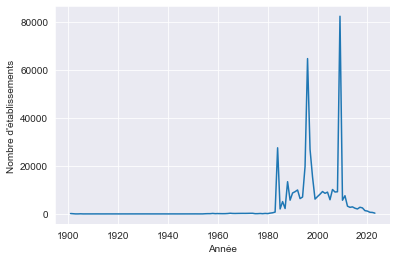

In [263]:
#df = df.set_index('dateDebut')

# Agréger les données par année
df_an = df.resample('A').count()

# Tracer un graphique montrant l'évolution du nombre d'établissements par année
plt.plot(df_an.index, df_an['siret'])
plt.xlabel('Année')
plt.ylabel('Nombre d\'établissements')
plt.show()

In [246]:
df_an.head(100)

,siren,nic,siret,changementEtatAdministratifEtablissement,changementEnseigneEtablissement,changementDenominationUsuelleEtablissement,changementActivitePrincipaleEtablissement,changementCaractereEmployeurEtablissement
dateDebut,,,,,,,,
1900-12-31,9785866877,3629,978586687703629,0.0,1.0,0.0,4.0,0.0
1901-12-31,12542861716,4672,1254286171604672,0.0,0.0,0.0,12.0,0.0
1902-12-31,120566511,188,12056651100188,0.0,0.0,0.0,0.0,0.0
1903-12-31,222894651,155,22289465100155,0.0,0.0,0.0,0.0,0.0
1904-12-31,8808565719,22534,880856571922534,0.0,0.0,0.0,44.0,0.0
1905-12-31,0,0,0,0.0,0.0,0.0,0.0,0.0
1906-12-31,181400078,190,18140007800190,0.0,0.0,0.0,1.0,0.0
1907-12-31,247607221,338,24760722100338,0.0,0.0,0.0,1.0,0.0
1908-12-31,170304315,55,17030431500055,0.0,0.0,0.0,1.0,0.0


In [235]:
df.head(1000)

,siren,nic,siret,dateFin,dateDebut,etatAdministratifEtablissement,changementEtatAdministratifEtablissement,enseigne1Etablissement,changementEnseigneEtablissement,changementDenominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,changementActivitePrincipaleEtablissement,caractereEmployeurEtablissement,changementCaractereEmployeurEtablissement
393553,86972056,13,8697205600013,1984-12-24,1900-01-01,A,False,NR,False,False,77.10,NAP,False,N,False
64164,26340414,15,2634041400015,1993-06-29,1900-01-01,A,False,NR,False,False,70.2C,NAF1993,False,null,False
250785,47110028,17,4711002800017,2003-01-30,1900-01-01,A,False,NR,False,False,64.49,NAP,False,null,False
273292,56805708,23,5680570800023,1956-07-02,1900-01-01,null,False,NR,False,False,55.60,NAP,False,null,False
63659,26270645,26,2627064500026,1993-12-24,1900-01-01,A,False,NR,False,False,45.2A,NAF1993,False,null,False
307186,63700835,18,6370083500018,1984-12-24,1900-01-01,A,False,NR,False,False,00.97,NAP,False,N,False
63796,26274829,14,2627482900014,1984-12-24,1900-01-01,A,False,NR,False,False,64.24,NAP,False,N,False
382943,85811271,15,8581127100015,1986-12-24,1900-01-01,F,False,NR,False,False,67.04,NAP,False,null,False
349216,71802516,14,7180251600014,1971-03-31,1900-01-01,F,False,NR,False,False,87.03,NAP,False,null,False
77113,35710466,18,3571046600018,1982-12-24,1900-01-01,F,False,NR,False,False,81.21,NAP,False,null,False


In [ ]:
# Faire un camembert/histogramme de :
# - binaire ou presque -> histo, bcp -> camembert
# - etatAdministratifEtablissement
# - activitePrincipaleEtablissement
# - changementActivitePrincipaleEtablissement
# - changementEnseigneEtablissement
# - changementEtatAdministratifEtablissement
# - On peut dire par ex : ya bcp de changement d'etat administratif quand l'etat est actif (copilot) -> on peut en déduire que les entreprises qui changent d'etat sont actives
# - caractereEmployeurEtablissement
# - changementCaractereEmployeurEtablissement

([<matplotlib.patches.Wedge at 0x2b73fd72b80>,
 [Text(-1.096896353765621, 0.08257353750255635, 'False'),
  Text(1.0968963489336863, -0.08257360168933695, 'True')])

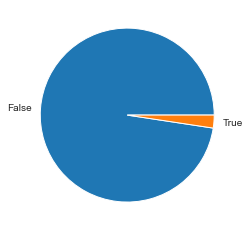

In [157]:
plt.pie(df['changementEnseigneEtablissement'].value_counts(normalize=True), labels=df['changementEnseigneEtablissement'].value_counts(normalize=True).index)

([<matplotlib.patches.Wedge at 0x2b6827c60a0>,
  ...],
 [Text(0.8836328150338845, 0.6551282685057127, '70.3C'),
  Text(-0.06939394734064255, 1.0978089451596231, '75.1A'),
  Text(-0.6872200740550867, 0.8589112700481473, '80.1Z'),
  Text(-0.9677209652239303, 0.5229876991536847, '84.11Z'),
  Text(-1.0723541323945047, 0.2450645113769621, '81.10Z'),
  Text(-1.0999038010948097, 0.014547451226575482, '84.13Z'),
  Text(-1.087880491590802, -0.16283745274400208, '75.1E'),
  Text(-1.0525417026901631, -0.3196184664535088, '70.2C'),
  Text(-0.9975037239761652, -0.4636661737216582, '70.1C'),
  Text(-0.9263294824036884, -0.5932231367956876, '80.2A'),
  Text(-0.8460477132842202, -0.7029959223541359, '75.1C'),
  Text(-0.7606610703706771, -0.7946035086900486, '41.0Z'),
  Text(-0.668020742261899, -0.8739269351083429, '90.0A'),
  Text(-0.569535110198573, -0.9410790393219368, '85.20Z'),
  Text(-0.48372451569418834, -0.9879324839868476, '42.99Z'),
  Text(-0.4142649217486185, -1.0190115674557434, '84.12Z'),


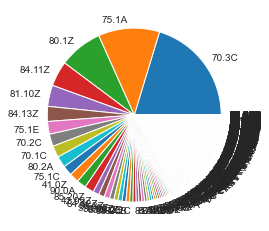

In [265]:
plt.pie(df['activitePrincipaleEtablissement'].value_counts(normalize=True), labels=df['activitePrincipaleEtablissement'].value_counts(normalize=True).index)